In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wF3jFzwEFKvPF2_4a4NFK4r91twuVTSBkla6d-lfmwxihlUVkWoNjI
Mounted at /content/gdrive


In [ ]:
import pandas as pd
df = pd.read_excel('/content/gdrive/My Drive/Colab Notebooks/Datasets/Incidents_service.xlsx')
df.shape

(141712, 25)

In [ ]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Data Cleaning Phase

In [ ]:
df.columns

Index(['ID', 'ID_status', 'active', 'count_reassign', 'count_opening',
       'count_updated', 'ID_caller', 'opened_by', 'opened_time', 'Created_by',
       'created_at', 'updated_by', 'updated_at', 'type_contact', 'location',
       'category_ID', 'user_symptom', 'impact', 'Support_group',
       'support_incharge', 'Doc_knowledge', 'confirmation_check', 'notify',
       'problem_id', 'change request'],
      dtype='object')

In [ ]:
df_new = df[['ID_status', 'active', 'count_reassign', 'count_opening',
       'count_updated',  'opened_by', 'opened_time', 'Created_by',
       'created_at', 'updated_by', 'updated_at', 'type_contact', 'location',
       'category_ID', 'user_symptom', 'impact', 'Support_group',
       'support_incharge', 'Doc_knowledge', 'confirmation_check', 'notify']]

In [ ]:
df_new.ID_status.value_counts()

Active                38716
New                   36407
Resolved              25751
Closed                24985
Awaiting User Info    14642
Awaiting Vendor         707
Awaiting Problem        461
Awaiting Evidence        38
-100                      5
Name: ID_status, dtype: int64

In [ ]:
df_new = df_new[df_new.ID_status != -100]
df_new.ID_status.value_counts()

Active                38716
New                   36407
Resolved              25751
Closed                24985
Awaiting User Info    14642
Awaiting Vendor         707
Awaiting Problem        461
Awaiting Evidence        38
Name: ID_status, dtype: int64

In [ ]:
df_new.head()

,ID_status,active,count_reassign,count_opening,count_updated,opened_by,opened_time,Created_by,created_at,updated_by,updated_at,type_contact,location,category_ID,user_symptom,impact,Support_group,support_incharge,Doc_knowledge,confirmation_check,notify
0,New,True,0,0,0,Opened by 8,2016-02-29 01:16:00,Created by 6,2016-02-29 01:23:00,Updated by 21,2016-02-29 01:23:00,Phone,Location 143,Category 55,Symptom 72,2 - Medium,Group 56,Resolver 17,True,False,Do Not Notify
1,Resolved,True,0,0,3,Opened by 8,2016-02-29 01:16:00,Created by 6,2016-02-29 01:23:00,Updated by 804,2016-02-29 11:29:00,Phone,Location 143,Category 55,Symptom 72,2 - Medium,Group 56,Resolver 17,True,False,Do Not Notify
2,Closed,False,0,0,4,Opened by 8,2016-02-29 01:16:00,Created by 6,2016-02-29 01:23:00,Updated by 908,2016-03-05 12:00:00,Phone,Location 143,Category 55,Symptom 72,2 - Medium,Group 56,Resolver 17,True,False,Do Not Notify
3,Active,True,1,0,1,Opened by 397,2016-02-29 04:40:00,Created by 171,2016-02-29 04:57:00,Updated by 21,2016-02-29 05:30:00,Phone,Location 165,Category 40,Symptom 471,2 - Medium,Group 24,Resolver 31,True,False,Do Not Notify
4,Active,True,1,0,2,Opened by 397,2016-02-29 04:40:00,Created by 171,2016-02-29 04:57:00,Updated by 21,2016-02-29 05:33:00,Phone,Location 165,Category 40,Symptom 471,2 - Medium,Group 24,Resolver 31,True,False,Do Not Notify


In [ ]:
df_new.shape

(141707, 21)

we will make a copy of our dataset, to perform operations on it.

In [ ]:
df_copy = df_new

In [ ]:
df_copy.columns

Index(['ID_status', 'active', 'count_reassign', 'count_opening',
       'count_updated', 'opened_by', 'opened_time', 'Created_by', 'created_at',
       'updated_by', 'updated_at', 'type_contact', 'location', 'category_ID',
       'user_symptom', 'impact', 'Support_group', 'support_incharge',
       'Doc_knowledge', 'confirmation_check', 'notify'],
      dtype='object')

In [ ]:
categorical_features = df_copy[['ID_status', 'active',  'opened_by',  'Created_by',
                               'updated_by',  'type_contact', 'location', 'category_ID',
                               'user_symptom', 'Support_group', 'support_incharge',
                               'Doc_knowledge', 'confirmation_check', 'notify']]

In [ ]:
for x in categorical_features.columns:
  dummies = pd.get_dummies( df_copy[x], prefix=x, dummy_na=False, drop_first= True)
  df_copy = df_copy.drop(x, 1)
  df_copy = pd.concat([df_copy, dummies], axis=1)

df_copy.shape

(141707, 2370)

In [ ]:
df_copy.impact.value_counts()

2 - Medium    134330
3 - Low         3886
1 - High        3491
Name: impact, dtype: int64

In [ ]:
df_copy['impact'] = df_copy['impact'].map(({'1 - High':1, '2 - Medium':2,'3 - Low':3 }))
df_copy.head()

,count_reassign,count_opening,count_updated,opened_time,created_at,updated_at,impact,ID_status_Awaiting Evidence,ID_status_Awaiting Problem,ID_status_Awaiting User Info,ID_status_Awaiting Vendor,ID_status_Closed,ID_status_New,ID_status_Resolved,active_True,opened_by_Opened by 101,opened_by_Opened by 104,opened_by_Opened by 106,opened_by_Opened by 108,opened_by_Opened by 109,opened_by_Opened by 111,opened_by_Opened by 118,opened_by_Opened by 119,opened_by_Opened by 12,opened_by_Opened by 120,opened_by_Opened by 122,opened_by_Opened by 124,opened_by_Opened by 128,opened_by_Opened by 131,opened_by_Opened by 14,opened_by_Opened by 141,opened_by_Opened by 142,opened_by_Opened by 144,opened_by_Opened by 147,opened_by_Opened by 148,opened_by_Opened by 150,opened_by_Opened by 151,opened_by_Opened by 155,opened_by_Opened by 157,opened_by_Opened by 159,...,support_incharge_Resolver 6,support_incharge_Resolver 62,support_incharge_Resolver 63,support_incharge_Resolver 64,support_incharge_Resolver 65,support_incharge_Resolver 66,support_incharge_Resolver 67,support_incharge_Resolver 68,support_incharge_Resolver 69,support_incharge_Resolver 7,support_incharge_Resolver 71,support_incharge_Resolver 73,support_incharge_Resolver 74,support_incharge_Resolver 75,support_incharge_Resolver 76,support_incharge_Resolver 77,support_incharge_Resolver 78,support_incharge_Resolver 8,support_incharge_Resolver 81,support_incharge_Resolver 82,support_incharge_Resolver 83,support_incharge_Resolver 84,support_incharge_Resolver 85,support_incharge_Resolver 86,support_incharge_Resolver 87,support_incharge_Resolver 88,support_incharge_Resolver 89,support_incharge_Resolver 9,support_incharge_Resolver 90,support_incharge_Resolver 91,support_incharge_Resolver 92,support_incharge_Resolver 93,support_incharge_Resolver 94,support_incharge_Resolver 96,support_incharge_Resolver 97,support_incharge_Resolver 98,support_incharge_Resolver 99,Doc_knowledge_True,confirmation_check_True,notify_Send Email
0,0,0,0,2016-02-29 01:16:00,2016-02-29 01:23:00,2016-02-29 01:23:00,2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,3,2016-02-29 01:16:00,2016-02-29 01:23:00,2016-02-29 11:29:00,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,4,2016-02-29 01:16:00,2016-02-29 01:23:00,2016-03-05 12:00:00,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,1,2016-02-29 04:40:00,2016-02-29 04:57:00,2016-02-29 05:30:00,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,2,2016-02-29 04:40:00,2016-02-29 04:57:00,2016-02-29 05:33:00,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
X = df_copy.drop(labels=['opened_time',	'created_at',	'updated_at',	'impact'], axis=1)
y = df_copy['impact']
print(X.shape)
print(y.shape)

(141707, 2366)
(141707,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [ ]:
pca = PCA( )
pca.fit(X)
print(pca.explained_variance_ratio_.cumsum())

[0.85823932 0.88930293 0.89704985 ... 1.         1.         1.        ]


In [ ]:
pipe = Pipeline([
('scaler', StandardScaler()),
('reducer', PCA(n_components=10))])
pc = pipe.fit_transform(X)

In [ ]:
df_copy1 = df_new
df_copy1.shape

(141707, 21)

In [ ]:
df_copy1['impact'] = df_copy1['impact'].map(({'1 - High':1, '2 - Medium':2,'3 - Low':3 }))
df_copy1.head()

,ID_status,active,count_reassign,count_opening,count_updated,opened_by,opened_time,Created_by,created_at,updated_by,updated_at,type_contact,location,category_ID,user_symptom,impact,Support_group,support_incharge,Doc_knowledge,confirmation_check,notify
0,New,True,0,0,0,Opened by 8,2016-02-29 01:16:00,Created by 6,2016-02-29 01:23:00,Updated by 21,2016-02-29 01:23:00,Phone,Location 143,Category 55,Symptom 72,2,Group 56,Resolver 17,True,False,Do Not Notify
1,Resolved,True,0,0,3,Opened by 8,2016-02-29 01:16:00,Created by 6,2016-02-29 01:23:00,Updated by 804,2016-02-29 11:29:00,Phone,Location 143,Category 55,Symptom 72,2,Group 56,Resolver 17,True,False,Do Not Notify
2,Closed,False,0,0,4,Opened by 8,2016-02-29 01:16:00,Created by 6,2016-02-29 01:23:00,Updated by 908,2016-03-05 12:00:00,Phone,Location 143,Category 55,Symptom 72,2,Group 56,Resolver 17,True,False,Do Not Notify
3,Active,True,1,0,1,Opened by 397,2016-02-29 04:40:00,Created by 171,2016-02-29 04:57:00,Updated by 21,2016-02-29 05:30:00,Phone,Location 165,Category 40,Symptom 471,2,Group 24,Resolver 31,True,False,Do Not Notify
4,Active,True,1,0,2,Opened by 397,2016-02-29 04:40:00,Created by 171,2016-02-29 04:57:00,Updated by 21,2016-02-29 05:33:00,Phone,Location 165,Category 40,Symptom 471,2,Group 24,Resolver 31,True,False,Do Not Notify


In [ ]:
X_temp = df_copy1.drop(labels=['opened_time',	'created_at',	'updated_at',	'impact'], axis=1)
y_temp = df_copy1['impact']

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoders = {}
categorical_columns = X_temp.columns  
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    X_temp[column] = label_encoders[column].fit_transform(X_temp[column])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,min_samples_leaf=0.12,random_state=100)
# Fit 'rf' to the training set
rf.fit(X_temp, y_temp)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=0.12,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=100, verbose=0, warm_start=False)

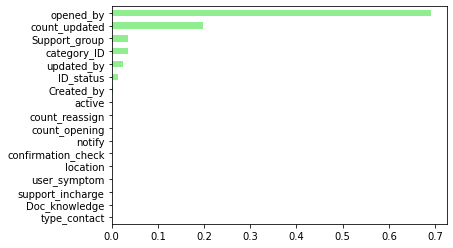

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_, index = X_temp.columns)
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='lightgreen');
plt.show()

In [ ]:
X_temp.columns

Index(['ID_status', 'active', 'count_reassign', 'count_opening',
       'count_updated', 'opened_by', 'Created_by', 'updated_by',
       'type_contact', 'location', 'category_ID', 'user_symptom',
       'Support_group', 'support_incharge', 'Doc_knowledge',
       'confirmation_check', 'notify'],
      dtype='object')

In [ ]:
X1 = X_temp[['opened_by', 'count_updated', 'Support_group', 'category_ID', 'ID_status']]
y1 = df_new['impact']
X1.shape
y1.shape

(141707,)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Set seed for reproducibility
SEED = 100
# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X1, y1,test_size=0.3,random_state=SEED)
rf = RandomForestRegressor(n_estimators=400,min_samples_leaf=0.12,random_state=SEED)
# Fit 'rf' to the training set
rf.fit(X_train, y_train)
# Predict the test set labels 'y_pred'
y_pred = rf.predict(X_test)
# Evaluate the test set 
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of RF Classifier: {:.3f}'.format(accuracy))

ValueError: ignored